In [ ]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import eli5

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
#from pdpbox import pdp, 

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
RANDOM_SEED = 42

In [ ]:
#Loading training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/test.csv')

In [ ]:
#dropping columns from training data
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

Feature Engineering

In [ ]:
#Standard Scaler function
scaler = StandardScaler()

In [ ]:
#Transforming the dataset into standard scaler
tr = scaler.fit_transform(X)

In [ ]:
#Splitting the data in train and validation split
X_train, X_val, y_train, y_val = train_test_split(tr,y, random_state = 1)

In [ ]:
#Logistic Regression function
lgr = LogisticRegression(C=0.1, class_weight= {0:0.1, 1:0.9} , penalty='l2' , solver='saga')

In [ ]:
#Fitting the logistic regression model
lgr.fit(X_train,y_train)
yt_p = lgr.predict(X_train)
yv_p = lgr.predict(X_val)

In [ ]:
#Printing the training and Validation accuracy
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.78076
Validation  Accuracy 0.77842


In [ ]:
#Calculating the roc auc score of the training and validation set
tr_auc = roc_auc_score(y_train,yt_p)
vt_auc = roc_auc_score(y_val, yv_p)

In [ ]:
tr_auc


0.781714151831326

In [ ]:
vt_auc

0.7781741414681467

In [ ]:
#Classification report of the training data
print(classification_report(y_train, yt_p))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86    134845
           1       0.29      0.78      0.42     15155

    accuracy                           0.78    150000
   macro avg       0.63      0.78      0.64    150000
weighted avg       0.90      0.78      0.82    150000



In [ ]:
#Classification report of the validation data
print(classification_report(y_val, yv_p))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     45057
           1       0.28      0.78      0.41      4943

    accuracy                           0.78     50000
   macro avg       0.62      0.78      0.64     50000
weighted avg       0.90      0.78      0.82     50000



In [ ]:
#Confusion matrices of training and validation set
x = metrics.confusion_matrix(y_val, yv_p)
y = metrics.confusion_matrix(y_train, yt_p)

Text(91.68, 0.5, 'predicted label')

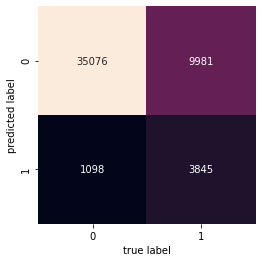

In [ ]:
sns.heatmap(x,square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

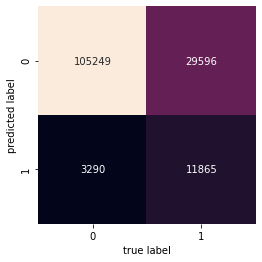

In [ ]:
sns.heatmap(y,square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

Under Sampling

In [ ]:
#Importing libraries for under sampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
#Dropping columns from under sampling
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [ ]:
scaler = StandardScaler()

In [ ]:
tr = scaler.fit_transform(X)

In [ ]:
#Under Sampling the data
X_over, y_over = undersample.fit_resample(tr, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Splitting the under sampled data in train test split
X_train, X_val, y_train, y_val = train_test_split(X_over,y_over, random_state = 1)

In [ ]:
#Logistic regression for the under sampled data
lgr = LogisticRegression(C=0.1, class_weight= 'balanced' , penalty='l2' , solver='saga')

In [ ]:
#Fitting the model
lgr.fit(X_train,y_train)
yt_p = lgr.predict(X_train)
yv_p = lgr.predict(X_val)

In [ ]:
#Training and Validation accuracy
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.7814376223173118
Validation  Accuracy 0.7841576276246393


In [ ]:
#Roc auc score for training and validation data
tr_auc = roc_auc_score(y_train,yt_p)
vt_auc = roc_auc_score(y_val, yv_p)

In [ ]:
tr_auc

0.781440290438445

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,yv_p)

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Logistic Regression (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for Logisic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
vt_auc

0.7841410868651383

Data Augmentation

In [ ]:
#Smote Technique for Data Augmentation
from imblearn.over_sampling import SMOTE 

In [ ]:
#Again dropping columns from the Augmented Data
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [ ]:
#Standard Scaler Function
scaler = StandardScaler()

In [ ]:
tr = scaler.fit_transform(X)

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
#Resampling the data through SMOTE
X_sm, y_sm = sm.fit_resample(tr, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_sm,y_sm, random_state = 1)

In [ ]:
lgr = LogisticRegression(C=0.1 , penalty='l2' , solver='saga')

In [ ]:
lgr.fit(X_train,y_train)
yt_p = lgr.predict(X_train)
yv_p = lgr.predict(X_val)

In [ ]:
#Printing the training and Validation accuracy
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.8001800980533846
Validation  Accuracy 0.7998577003034986


In [ ]:
#Training and Validation Roc auc score
tr_auc = roc_auc_score(y_train,yt_p)
vt_auc = roc_auc_score(y_val, yv_p)

In [ ]:
tr_auc

0.8001831954936381

In [ ]:
vt_auc

0.7998475240461842

In [ ]:
#Classification report of training data
print(classification_report(y_train, yt_p))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    134970
           1       0.79      0.81      0.80    134883

    accuracy                           0.80    269853
   macro avg       0.80      0.80      0.80    269853
weighted avg       0.80      0.80      0.80    269853



In [ ]:
#Classificationr report of Validation data
print(classification_report(y_val, yv_p))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     44932
           1       0.79      0.81      0.80     45019

    accuracy                           0.80     89951
   macro avg       0.80      0.80      0.80     89951
weighted avg       0.80      0.80      0.80     89951



In [ ]:
#Confusion matrices of Trainng and Validation data
x = metrics.confusion_matrix(y_val, yv_p)
y = metrics.confusion_matrix(y_train, yt_p)

Text(91.68, 0.5, 'predicted label')

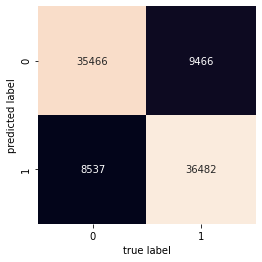

In [ ]:
sns.heatmap(x,square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

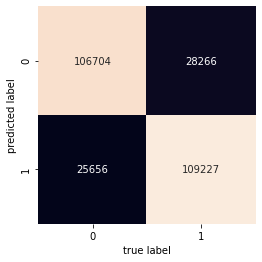

In [ ]:
sns.heatmap(y,square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')